In [1]:
import traintools
import networkx as nx
from trainconstants import *

df = traintools.read_schedule("datasets/nsdata1.txt")
test_train_type = TYPE_3_TRAIN

lowerbound = traintools.minimum_number_of_trains_at_time_t(df, test_train_type).max()[0]

G = traintools.graph_from_schedule(df, test_train_type)
all_trains, number_of_trains, starting_trains, ending_trains, G = traintools.attempt_solution_correct_endpoints(G.copy())

print({station: len(trains) for station, trains in starting_trains.items()}, {station: len(trains) for station, trains in ending_trains.items()})
print('Endpoints match!'*({station: len(trains) for station, trains in starting_trains.items()} == {station: len(trains) for station, trains in ending_trains.items()}))
print('using:', number_of_trains)

df_ = nx.to_pandas_edgelist(G.copy())
df_['over_scheduled'] = df_['trains_scheduled'] - df_['trains_needed']
G_ = nx.from_pandas_edgelist(
        df=df_, 
        source='source', 
        target='target', 
        edge_attr=['over_scheduled'], 
        create_using=nx.DiGraph
        )
all_trains2, number_of_trains2, starting_trains2, ending_trains2, G2 = traintools.find_over_scheduled(G_)

print(number_of_trains2, 'train(s) can be subtracted')
print(f'Total number of trains scheduled: {number_of_trains - number_of_trains2}')
print(f'Lowerbound: {lowerbound}')
if lowerbound == number_of_trains - number_of_trains2:
    print('Optimal solution found!')

{4: 9, 3: 4, 2: 1, 1: 3} {3: 4, 2: 1, 1: 3, 4: 9}
Endpoints match!
using: 17
0 train(s) can be subtracted
Total number of trains scheduled: 17
Lowerbound: 17.0
Optimal solution found!


c:\Users\20212751\OneDrive - TU Eindhoven\Desktop\train modeling\traintools.py:521: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(range(300, 1500, 100))


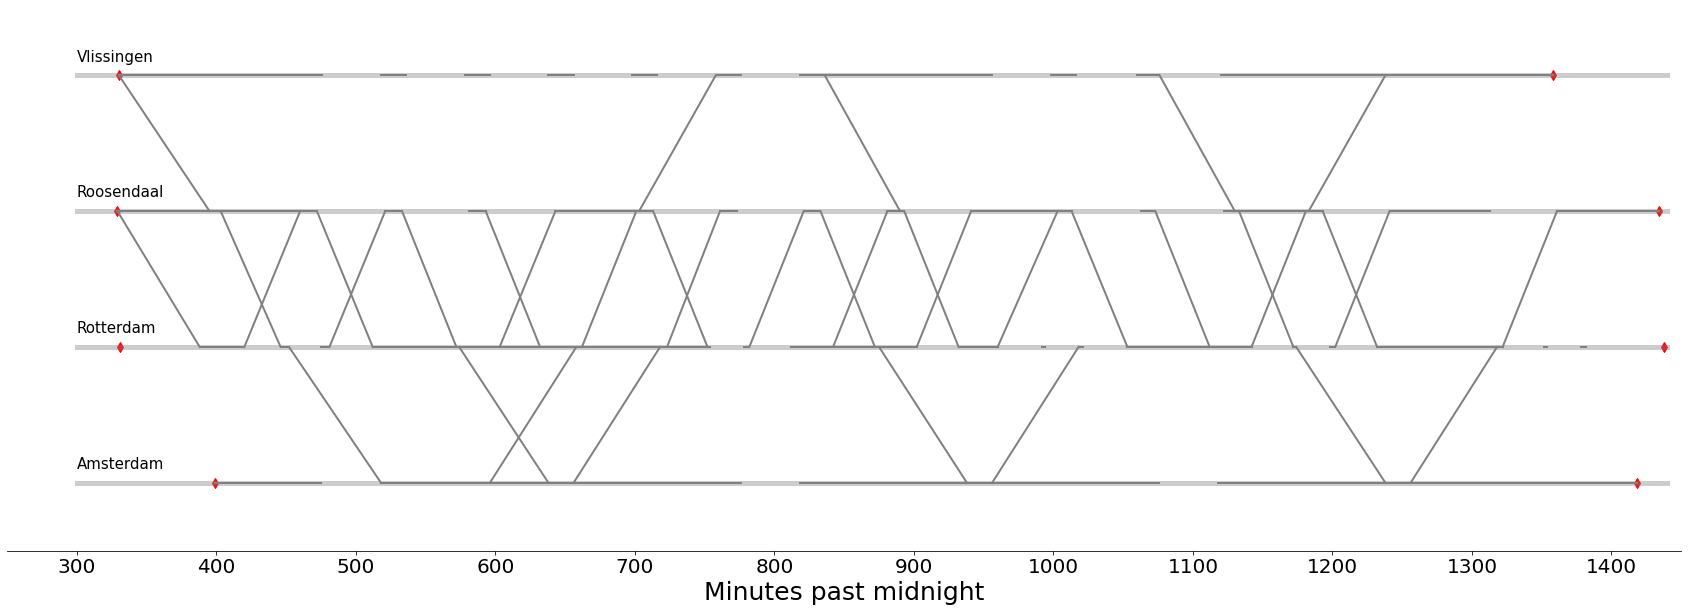

In [2]:
traintools.highlight_paths(all_trains2, G2)